Proyecto Gestion y Almacenamiento de datos

GABRIEL ESTEBAN VELEZ MEJIA


In [37]:
# Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from plotnine import (
    ggplot,
    aes,
    geom_boxplot,
    geom_jitter,
    scale_x_discrete,
    coord_flip,
    theme_bw,
    theme,
    element_text,
    scale_y_discrete
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Importar datos
calidad = pd.read_excel("/content/drive/MyDrive/Proyecto gestion/Indicadores PT 2023.xlsx", header = 0)
produccion = pd.read_excel("/content/drive/MyDrive/Proyecto gestion/Ingreso de batch record 2023.xlsx", header = 0)
documentacion = pd.read_excel("/content/drive/MyDrive/Proyecto gestion/INDICE DE BATCH RECORD.xlsx", header = 0).dropna(how='all')

In [39]:
# Analisis inicial de la estructura de los datos
calidad.head()

,Producto,Lote,Numero de muestra LIMSCOL,Fecha Ingreso PT,Análisis a realizar,Análisis Pendientes,Fecha entrega PT,Analisis externos,Impurezas elementales,Certificado,Observaciones
0,Zetygrip 4 jbe niños,00123,NaN,NaT,NaN,NaN,NaT,OK,NaN,2023-05-23,NaN
1,Sugastrin tab,00423,PT23-60,2023-02-14,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN
2,Sugastrin tab,00623,PT23-61,2023-02-14,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN
3,Paragrip caps,00823,PT23-205,2023-04-19,NaN,NaN,2023-05-04,OK,NaN,2023-05-08,NaN
4,Sugastrin tab,01023,PT23-53,2023-02-13,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN


In [40]:
calidad.shape

(272, 11)

In [41]:
documentacion.shape

(279, 8)

In [42]:
produccion.shape

(1034, 39)

In [43]:
#Cambiar nombres de clientes y productos
def toggle(language):
    new_phrase = ""
    for letter in language:
        if letter in ['a', 'e', 'i', 'o', 'u'] or letter in ['A', 'E', 'I', 'O', 'U']:
            continue
        else:
            new_phrase += letter.upper()
    return new_phrase
calidad['Producto'] = calidad['Producto'].apply(toggle)
documentacion['CLIENTE'] = documentacion['CLIENTE'].apply(toggle)

Mediante esta código se cambian los nombres de los clientes y productos en las tablas de datos para proteger su identidad


In [44]:
documentacion['LOTE'] = documentacion['LOTE'].astype(str)
produccion['LOTE'] = produccion['LOTE'].astype(str)
calidad['LOTE'] = calidad['Lote'].astype(str)

Este código permite cambiar el tipo de dato a string de las columnas de 'Lote' en las tres tablas para poder usarlas como llave para crear la tabla de datos final.

In [45]:
#unificar el nombre de las columnas key
documentacion.rename(columns= {'LOTE':'Lote'}, inplace=True)
documentacion.dropna(subset=['Lote'], inplace=True)

In [46]:
#unificar el nombre de las columnas key
produccion.rename(columns= {'LOTE':'Lote'}, inplace=True)
produccion.dropna(subset=['Lote'], inplace=True)


Este código permite cambiar el nombre de la columna 'Lote' a 'LOTE' para poder usarlo como llave primaria entre las tres tablas

In [47]:
# Unir los dos dataframes
datos = pd.merge(calidad, produccion[['Lote','FECHA INICIO DE FABRICACIÓN','FECHA FINAL DE FABRICACIÓN']],on='Lote', how = 'left')
datos

,Producto,Lote,Numero de muestra LIMSCOL,Fecha Ingreso PT,Análisis a realizar,Análisis Pendientes,Fecha entrega PT,Analisis externos,Impurezas elementales,Certificado,Observaciones,LOTE,FECHA INICIO DE FABRICACIÓN,FECHA FINAL DE FABRICACIÓN
0,ZTYGRP 4 JB NÑS,00123,NaN,NaT,NaN,NaN,NaT,OK,NaN,2023-05-23,NaN,00123,2023-01-23,2023-02-24 00:00:00
1,SGSTRN TB,00423,PT23-60,2023-02-14,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN,00423,2023-01-24,2023-01-26 00:00:00
2,SGSTRN TB,00623,PT23-61,2023-02-14,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN,00623,2023-01-24,2023-01-26 00:00:00
3,PRGRP CPS,00823,PT23-205,2023-04-19,NaN,NaN,2023-05-04,OK,NaN,2023-05-08,NaN,00823,2023-01-23,2023-02-01 00:00:00
4,SGSTRN TB,01023,PT23-53,2023-02-13,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN,01023,2023-01-25,2023-01-27 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,MGCL TB,54823,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,54823,NaT,NaN
269,NGRPX JB,55023,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,55023,NaT,NaN
270,LMPDRM CRM,L2223,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,L2223,NaT,NaN
271,MGCL TB,55223,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,55223,NaT,NaN


In [48]:
#Unir los tres dataframes
datos = pd.merge(datos, documentacion[['Lote','CLIENTE']],on='Lote', how='left')
datos

,Producto,Lote,Numero de muestra LIMSCOL,Fecha Ingreso PT,Análisis a realizar,Análisis Pendientes,Fecha entrega PT,Analisis externos,Impurezas elementales,Certificado,Observaciones,LOTE,FECHA INICIO DE FABRICACIÓN,FECHA FINAL DE FABRICACIÓN,CLIENTE
0,ZTYGRP 4 JB NÑS,00123,NaN,NaT,NaN,NaN,NaT,OK,NaN,2023-05-23,NaN,00123,2023-01-23,2023-02-24 00:00:00,RCM
1,SGSTRN TB,00423,PT23-60,2023-02-14,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN,00423,2023-01-24,2023-01-26 00:00:00,FRMSR
2,SGSTRN TB,00623,PT23-61,2023-02-14,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN,00623,2023-01-24,2023-01-26 00:00:00,FRMSR
3,PRGRP CPS,00823,PT23-205,2023-04-19,NaN,NaN,2023-05-04,OK,NaN,2023-05-08,NaN,00823,2023-01-23,2023-02-01 00:00:00,FRMSR
4,SGSTRN TB,01023,PT23-53,2023-02-13,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN,01023,2023-01-25,2023-01-27 00:00:00,FRMSR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,MGCL TB,54823,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,54823,NaT,NaN,FRMSR
270,NGRPX JB,55023,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,55023,NaT,NaN,STLR
271,LMPDRM CRM,L2223,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,L2223,NaT,NaN,LG
272,MGCL TB,55223,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,55223,NaT,NaN,FRMSR


Este codigo permite unir los tres data frames con cada una de las columnas necesarias para llevar a cabo los análisis

Ver data frame a analizar

In [49]:
datos

,Producto,Lote,Numero de muestra LIMSCOL,Fecha Ingreso PT,Análisis a realizar,Análisis Pendientes,Fecha entrega PT,Analisis externos,Impurezas elementales,Certificado,Observaciones,LOTE,FECHA INICIO DE FABRICACIÓN,FECHA FINAL DE FABRICACIÓN,CLIENTE
0,ZTYGRP 4 JB NÑS,00123,NaN,NaT,NaN,NaN,NaT,OK,NaN,2023-05-23,NaN,00123,2023-01-23,2023-02-24 00:00:00,RCM
1,SGSTRN TB,00423,PT23-60,2023-02-14,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN,00423,2023-01-24,2023-01-26 00:00:00,FRMSR
2,SGSTRN TB,00623,PT23-61,2023-02-14,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN,00623,2023-01-24,2023-01-26 00:00:00,FRMSR
3,PRGRP CPS,00823,PT23-205,2023-04-19,NaN,NaN,2023-05-04,OK,NaN,2023-05-08,NaN,00823,2023-01-23,2023-02-01 00:00:00,FRMSR
4,SGSTRN TB,01023,PT23-53,2023-02-13,NaN,NaN,2023-03-22,NaN,NaN,2023-03-28,NaN,01023,2023-01-25,2023-01-27 00:00:00,FRMSR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,MGCL TB,54823,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,54823,NaT,NaN,FRMSR
270,NGRPX JB,55023,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,55023,NaT,NaN,STLR
271,LMPDRM CRM,L2223,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,L2223,NaT,NaN,LG
272,MGCL TB,55223,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,55223,NaT,NaN,FRMSR


In [50]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 273
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Producto                     274 non-null    object        
 1   Lote                         274 non-null    object        
 2   Numero de muestra LIMSCOL    220 non-null    object        
 3   Fecha Ingreso PT             220 non-null    datetime64[ns]
 4   Análisis a realizar          57 non-null     object        
 5   Análisis Pendientes          0 non-null      float64       
 6   Fecha entrega PT             204 non-null    datetime64[ns]
 7   Analisis externos            97 non-null     object        
 8   Impurezas elementales        11 non-null     object        
 9   Certificado                  190 non-null    datetime64[ns]
 10  Observaciones                2 non-null      object        
 11  LOTE                         274 non-null    

## Data cleaning:

1. Eliminar columnas que no son importantes para el analisis

In [51]:
datos.columns

Index(['Producto', 'Lote', 'Numero de muestra LIMSCOL', 'Fecha Ingreso PT',
       'Análisis a realizar', 'Análisis Pendientes', 'Fecha entrega PT',
       'Analisis externos', 'Impurezas elementales', 'Certificado',
       'Observaciones', 'LOTE', 'FECHA INICIO DE FABRICACIÓN',
       'FECHA FINAL DE FABRICACIÓN', 'CLIENTE'],
      dtype='object')

In [52]:
datos = datos[['Producto', 'Lote', 'Fecha Ingreso PT', 'Fecha entrega PT',
       'Analisis externos', 'Impurezas elementales', 'Certificado', 'FECHA INICIO DE FABRICACIÓN',
       'FECHA FINAL DE FABRICACIÓN', 'CLIENTE']]
datos.shape

(274, 10)

2. Eliminar la hora de la columna 'FECHA FINAL DE FABRICACIÓN'

In [53]:
datos['FECHA FINAL DE FABRICACIÓN'] = pd.to_datetime(datos['FECHA FINAL DE FABRICACIÓN'])
datos.head(10)

<ipython-input-53-8c37ec508c9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Producto,Lote,Fecha Ingreso PT,Fecha entrega PT,Analisis externos,Impurezas elementales,Certificado,FECHA INICIO DE FABRICACIÓN,FECHA FINAL DE FABRICACIÓN,CLIENTE
0,ZTYGRP 4 JB NÑS,00123,NaT,NaT,OK,NaN,2023-05-23,2023-01-23,2023-02-24,RCM
1,SGSTRN TB,00423,2023-02-14,2023-03-22,NaN,NaN,2023-03-28,2023-01-24,2023-01-26,FRMSR
2,SGSTRN TB,00623,2023-02-14,2023-03-22,NaN,NaN,2023-03-28,2023-01-24,2023-01-26,FRMSR
3,PRGRP CPS,00823,2023-04-19,2023-05-04,OK,NaN,2023-05-08,2023-01-23,2023-02-01,FRMSR
4,SGSTRN TB,01023,2023-02-13,2023-03-22,NaN,NaN,2023-03-28,2023-01-25,2023-01-27,FRMSR
5,FCCLR,0123,2023-07-17,NaT,NaN,NaN,NaT,2023-07-10,2023-07-11,LG
6,SGSTRN TB,01423,2023-02-13,2023-03-22,NaN,NaN,2023-03-31,2023-01-25,2023-01-30,FRMSR
7,SGSTRN TB,02023,2023-02-15,2023-03-22,NaN,NaN,2023-03-31,2023-01-26,2023-01-30,FRMSR
8,SGSTRN TB,02223,2023-02-13,2023-03-22,NaN,NaN,2023-03-31,2023-01-26,2023-01-31,FRMSR
9,FST PN GL,0223,2023-08-11,2023-08-18,NaN,NaN,NaT,2023-07-14,2023-07-17,LG


## Análisis de datos

1. Agregar columnas de control



> Se crean columnas basados en calculos con fechas en otras colunmnas para poder comparar el rendimiento de cada lote



In [54]:
datos['Tiempo de fabricación'] = datos['FECHA FINAL DE FABRICACIÓN']-datos['FECHA INICIO DE FABRICACIÓN']
datos['Tiempo de analisis'] = datos['Fecha entrega PT']- datos['Fecha Ingreso PT']
datos['Tiempo para liberar'] = datos['Certificado'] - datos['FECHA FINAL DE FABRICACIÓN']
datos['Tiempo de revision'] = datos['Certificado'] - datos['Fecha entrega PT']
datos.head()

<ipython-input-54-0d175f0e85d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-54-0d175f0e85d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-54-0d175f0e85d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-54-0d175f0e85d6>

,Producto,Lote,Fecha Ingreso PT,Fecha entrega PT,Analisis externos,Impurezas elementales,Certificado,FECHA INICIO DE FABRICACIÓN,FECHA FINAL DE FABRICACIÓN,CLIENTE,Tiempo de fabricación,Tiempo de analisis,Tiempo para liberar,Tiempo de revision
0,ZTYGRP 4 JB NÑS,00123,NaT,NaT,OK,NaN,2023-05-23,2023-01-23,2023-02-24,RCM,32 days,NaT,88 days,NaT
1,SGSTRN TB,00423,2023-02-14,2023-03-22,NaN,NaN,2023-03-28,2023-01-24,2023-01-26,FRMSR,2 days,36 days,61 days,6 days
2,SGSTRN TB,00623,2023-02-14,2023-03-22,NaN,NaN,2023-03-28,2023-01-24,2023-01-26,FRMSR,2 days,36 days,61 days,6 days
3,PRGRP CPS,00823,2023-04-19,2023-05-04,OK,NaN,2023-05-08,2023-01-23,2023-02-01,FRMSR,9 days,15 days,96 days,4 days
4,SGSTRN TB,01023,2023-02-13,2023-03-22,NaN,NaN,2023-03-28,2023-01-25,2023-01-27,FRMSR,2 days,37 days,60 days,6 days


Se define la fecha de 06/09/23 (fecha en que se tomó el último dato) para realizar el control con respecto a esa fecha.

In [55]:
#Definir fecha de control
hoy = pd.to_datetime('06/09/23')
type(hoy)

pandas._libs.tslibs.timestamps.Timestamp

In [56]:
#Definir columna estado
datos['Estado'] = np.where(datos['Certificado'].isnull(),
                           np.where((datos['FECHA FINAL DE FABRICACIÓN']-hoy)<pd.Timedelta("45 days"),'Cuarentena', 'Retrasado'), 'Liberado')
datos.head()

,Producto,Lote,Fecha Ingreso PT,Fecha entrega PT,Analisis externos,Impurezas elementales,Certificado,FECHA INICIO DE FABRICACIÓN,FECHA FINAL DE FABRICACIÓN,CLIENTE,Tiempo de fabricación,Tiempo de analisis,Tiempo para liberar,Tiempo de revision,Estado
0,ZTYGRP 4 JB NÑS,00123,NaT,NaT,OK,NaN,2023-05-23,2023-01-23,2023-02-24,RCM,32 days,NaT,88 days,NaT,Liberado
1,SGSTRN TB,00423,2023-02-14,2023-03-22,NaN,NaN,2023-03-28,2023-01-24,2023-01-26,FRMSR,2 days,36 days,61 days,6 days,Liberado
2,SGSTRN TB,00623,2023-02-14,2023-03-22,NaN,NaN,2023-03-28,2023-01-24,2023-01-26,FRMSR,2 days,36 days,61 days,6 days,Liberado
3,PRGRP CPS,00823,2023-04-19,2023-05-04,OK,NaN,2023-05-08,2023-01-23,2023-02-01,FRMSR,9 days,15 days,96 days,4 days,Liberado
4,SGSTRN TB,01023,2023-02-13,2023-03-22,NaN,NaN,2023-03-28,2023-01-25,2023-01-27,FRMSR,2 days,37 days,60 days,6 days,Liberado


## Análisis gráfico inicial


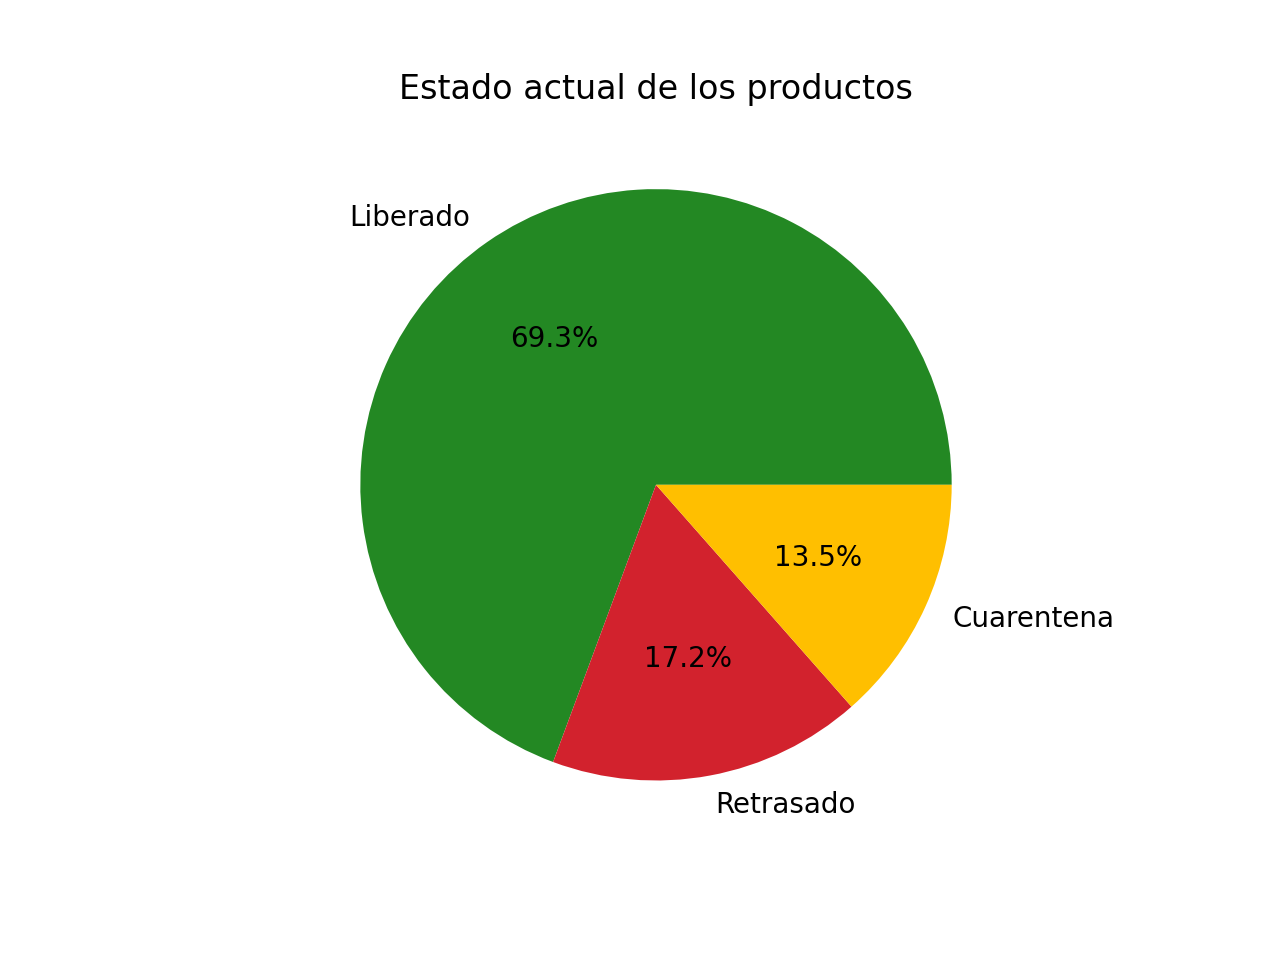

In [57]:
estado = pd.DataFrame(datos['Estado'].value_counts())
fig, ax = plt.subplots()
ax.pie(estado['Estado'], labels =  estado.index.values, colors = ['#238823', '#D2222D','#FFBF00'],autopct='%1.1f%%')
plt.title('Estado actual de los productos')
fig.show()

Gráfico de estado actual del producto con respecto a la fecha de control 06/09/23

In [58]:
# Seleccionar los retrasados e investigar los datos
retrasados = datos[datos['Estado']=='Retrasado']
dftotales = pd.DataFrame(datos['CLIENTE'].value_counts())
dfretrasados = pd.DataFrame(retrasados['CLIENTE'].value_counts())

dfclie_retra = dfretrasados.join(dftotales,lsuffix='_retrasados', rsuffix='_total')
dfclie_retra['Porcentaje'] = round(dfclie_retra['CLIENTE_retrasados']/dfclie_retra['CLIENTE_total']*100,1)

dfclie_retra.sort_values(by='Porcentaje', ascending=False)

,CLIENTE_retrasados,CLIENTE_total,Porcentaje
LDNKM,1,1,100.0
BD FRM,3,6,50.0
KVPHRM,1,2,50.0
QRPS,1,2,50.0
HC,2,5,40.0
NVX,7,20,35.0
MDGN,10,39,25.6
RPHRM,1,4,25.0
STLR,1,6,16.7
LG,4,27,14.8


Tabla que muestra el nombre de los clientes que tienen productos retrasado, la cantidad y el porcentaje con respecto a los productos que se han fabricado a lo largo del año

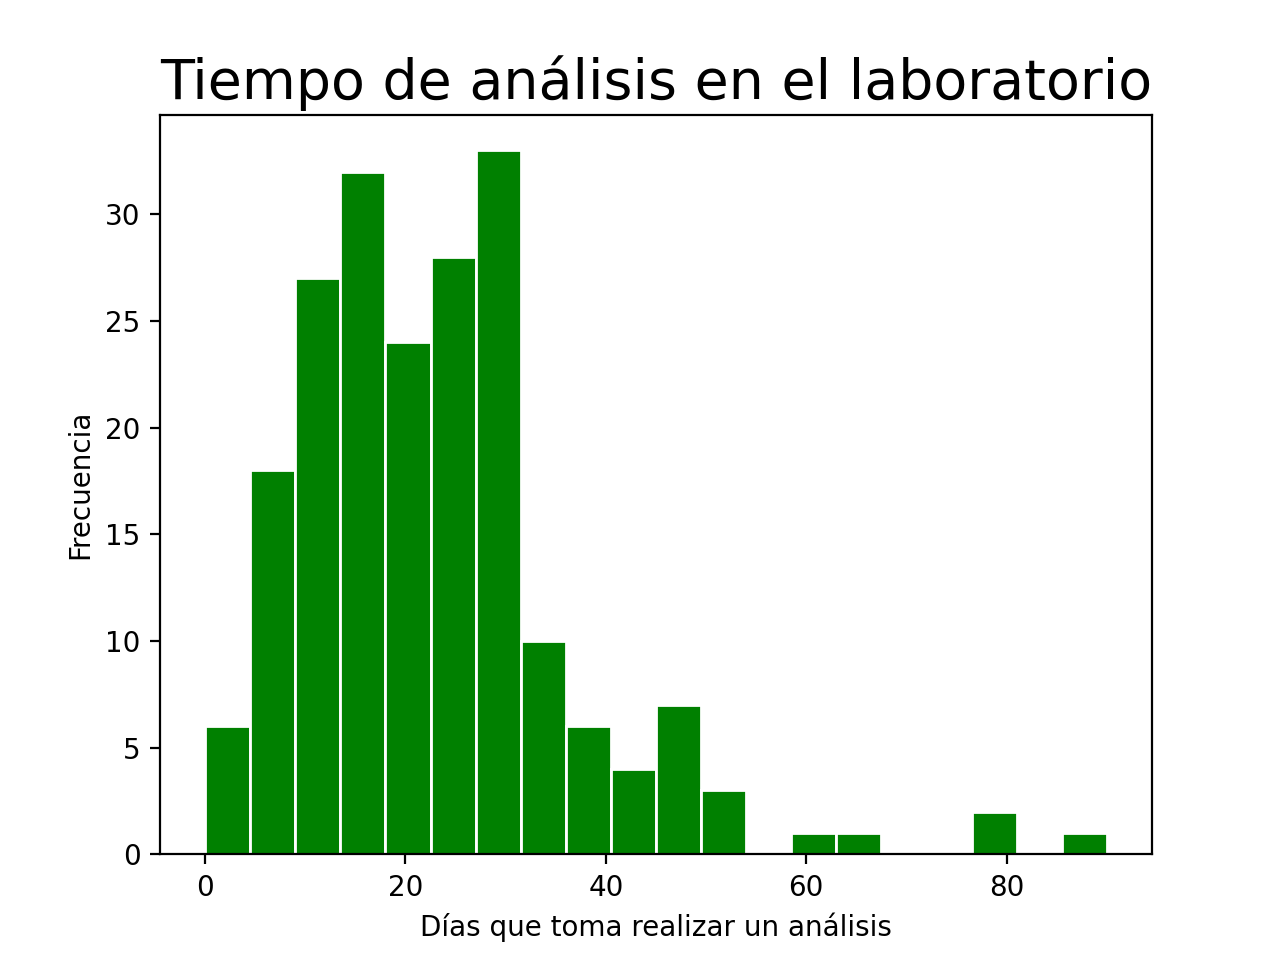

In [59]:
# Efectividad en el laboratorio
fig, ax = plt.subplots()
ax.hist(datos['Tiempo de analisis'].dropna().dt.days, range = (0,90), bins=20,  lw=1, ec="white", fc="green")
plt.title('Tiempo de análisis en el laboratorio', fontsize=20)
plt.xlabel('Días que toma realizar un análisis')
plt.ylabel('Frecuencia')
fig.show()

Gráfico que muestra los días que le toma a los productos ser analizados en el laboratorio de control de calidad de la empresa

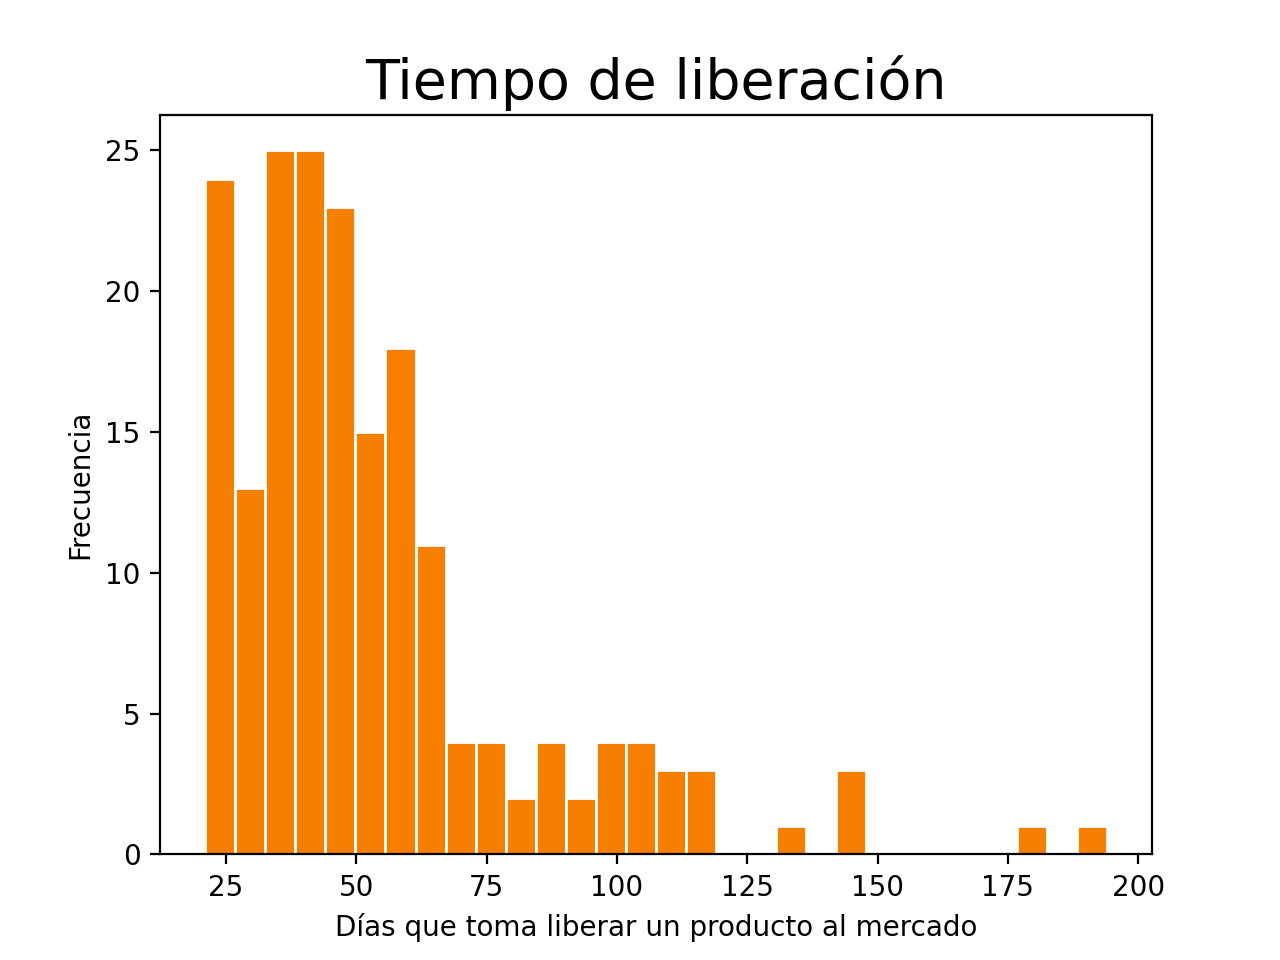

In [60]:
# Tiempo de liberacion
fig, ax = plt.subplots()
ax.hist(datos['Tiempo para liberar'].dropna().dt.days, bins=30,  lw=1, ec="white", fc="#F77F00")
plt.title('Tiempo de liberación', fontsize=20)
plt.xlabel('Días que toma liberar un producto al mercado')
plt.ylabel('Frecuencia')
fig.show()

Gráfico que muestra el tiempo que le toma a los productos ser liberados al mercado

In [61]:
#Analisis por mes
import locale
datos_meses = datos['Fecha entrega PT'].dropna().dt.month.value_counts().sort_index().reset_index()
datos_meses['mes'] = pd.to_datetime(datos_meses['index'], format='%m').dt.month_name()
datos_meses

,index,Fecha entrega PT,mes
0,2,7,February
1,3,31,March
2,4,48,April
3,5,34,May
4,6,30,June
5,7,27,July
6,8,27,August


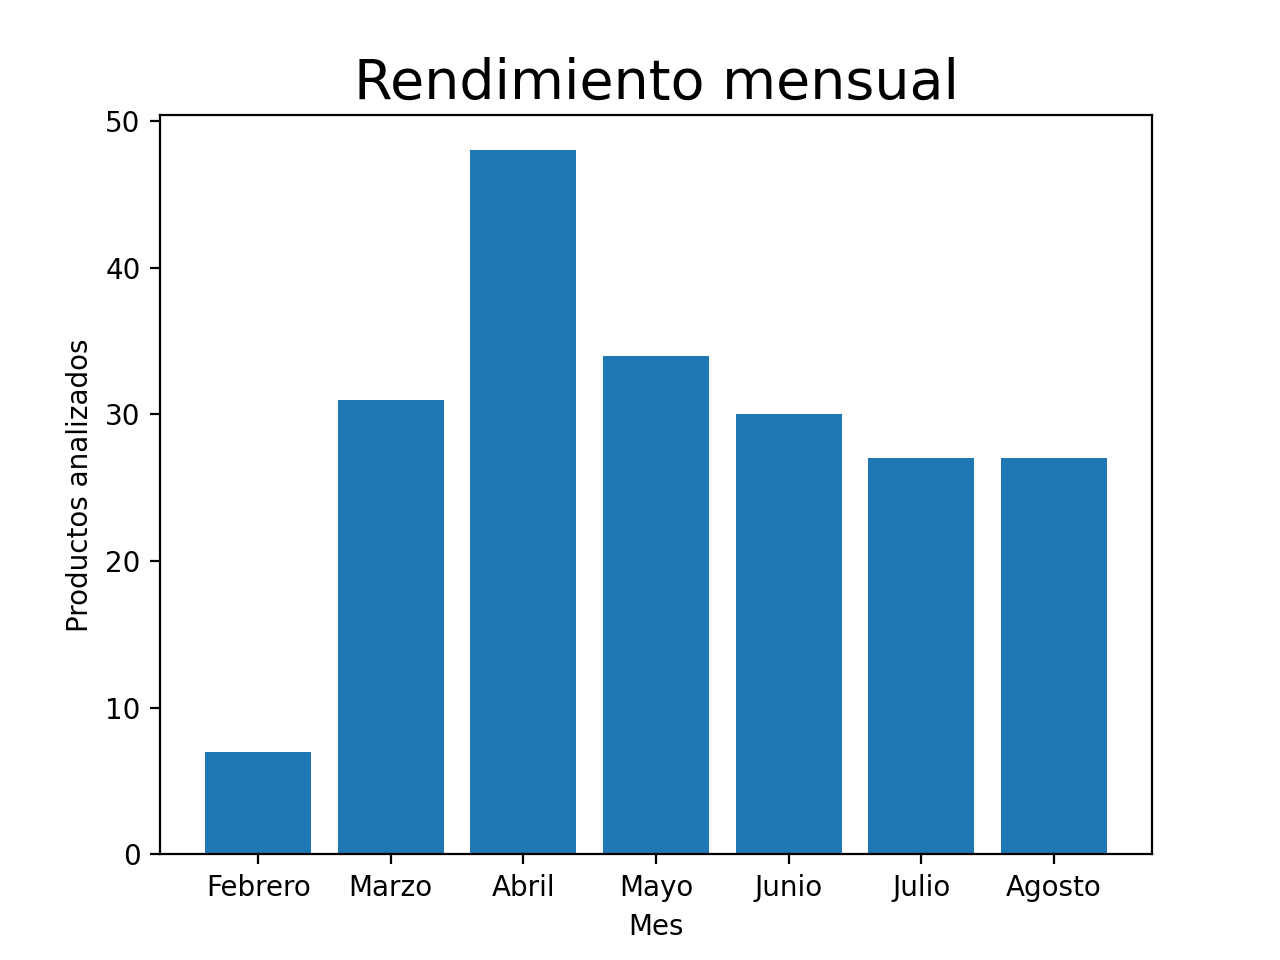

In [62]:
plt.bar(datos_meses['mes'],datos_meses['Fecha entrega PT'])
plt.xticks(ticks=['February', 'March','April','May', 'June', 'July','August'],
           labels=['Febrero','Marzo','Abril','Mayo', 'Junio', 'Julio', 'Agosto'])
plt.title('Rendimiento mensual', fontsize=20)
plt.xlabel('Mes')
plt.ylabel('Productos analizados')
fig.show()

Gráfico que muestra el número de productos analizados por cada mes en el laboratorio de control de calidad de la empresa para evaluar un rendimiento a lo largo de los meses

In [63]:
# Seleccionar los liberados e investigar los datos
liberados = datos[datos['Estado']=='Liberado']
tabla_liberados = pd.pivot_table(liberados,values=['Tiempo de fabricación','Tiempo de analisis', 'Tiempo de revision', 'Tiempo para liberar'],
               index= ['CLIENTE','Producto'], aggfunc='mean')

#convertir dias a numero
tabla_liberados['Tiempo de analisis'] = tabla_liberados['Tiempo de analisis'].dt.days
tabla_liberados['Tiempo de fabricación'] = tabla_liberados['Tiempo de fabricación'].dt.days
tabla_liberados['Tiempo de revision'] = tabla_liberados['Tiempo de revision'].dt.days
tabla_liberados['Tiempo para liberar'] = tabla_liberados['Tiempo para liberar'].dt.days

#ordrnar tabla
tabla_liberados = tabla_liberados[['Tiempo de fabricación','Tiempo de analisis', 'Tiempo de revision', 'Tiempo para liberar']]

#Filtrar liberados con más de 45 días
tabla_liberados_retrasados = tabla_liberados[tabla_liberados['Tiempo para liberar']>45]
tabla_liberados_retrasados.sort_values(by='Tiempo para liberar', ascending=False)


,,Tiempo de fabricación,Tiempo de analisis,Tiempo de revision,Tiempo para liberar
CLIENTE,Producto,,,,
BCR,SNTTN CPSLS,31,NaN,NaN,194
FRMSR,TTRVT ZR CPS,11,29.0,84.0,180
LG,FS CRM CRM,0,6.0,9.0,147
NVX,S-MTCN TBLTS,9,NaN,NaN,119
SRS,GRPFN PLS TB,9,NaN,NaN,118
FRMSR,RLZNC C JB,2,20.0,2.0,105
NV. SRCL,SDTSN CPS,19,NaN,NaN,101
KVPHRM,MCMD TS JB,1,NaN,NaN,99
NVX,S-MTCN GS RLF,1,NaN,NaN,90


In [64]:
tabla_liberados = pd.pivot_table(liberados,values=['Tiempo de fabricación','Tiempo de analisis', 'Tiempo de revision', 'Tiempo para liberar'],
               index= ['CLIENTE'], aggfunc='median')

#convertir dias a numero
tabla_liberados['Tiempo de analisis'] = tabla_liberados['Tiempo de analisis'].dt.days
tabla_liberados['Tiempo de fabricación'] = tabla_liberados['Tiempo de fabricación'].dt.days
tabla_liberados['Tiempo de revision'] = tabla_liberados['Tiempo de revision'].dt.days
tabla_liberados['Tiempo para liberar'] = tabla_liberados['Tiempo para liberar'].dt.days

#ordenar tabla
tabla_liberados = tabla_liberados[['Tiempo de fabricación','Tiempo de analisis', 'Tiempo de revision', 'Tiempo para liberar']]

#Filtrar liberados con más de 45 días
tabla_liberados_ordenada = tabla_liberados.sort_values(by='Tiempo para liberar', ascending=False)
df_liberados_ordenada = pd.DataFrame(tabla_liberados_ordenada)
df_liberados_ordenada.index

Index(['BCR', 'SRS', 'NVX', 'NV. SRCL', 'KVPHRM', 'RCM', 'HC', 'MDGN', 'RPHRM',
       'FRMSR', 'LG'],
      dtype='object', name='CLIENTE')

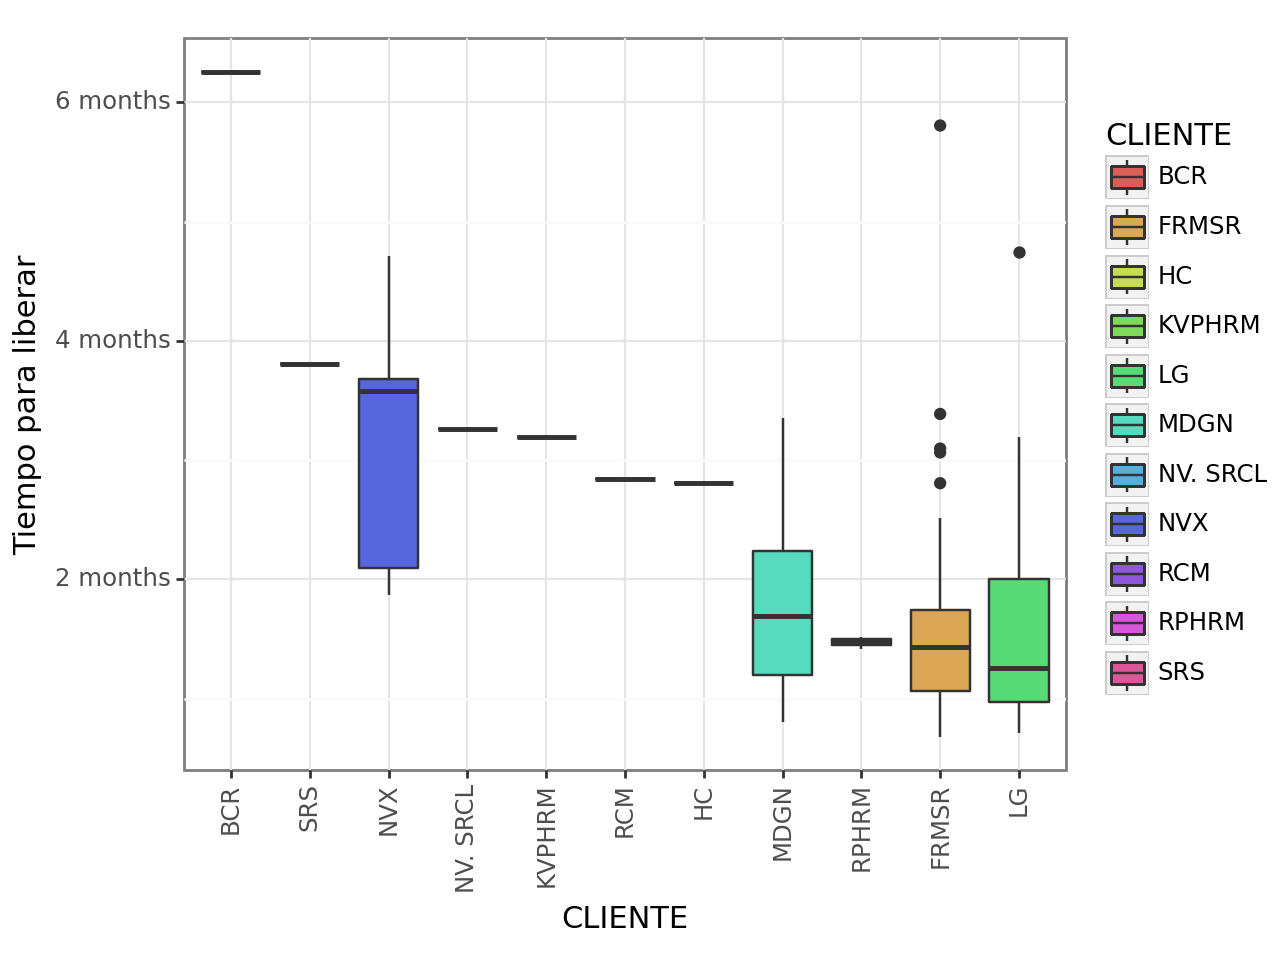

<Figure Size: (640 x 480)>

In [65]:
# Tiempos de liberacion por cliente (BOXPLOT)

(
    ggplot(liberados)
    + geom_boxplot(aes(x='CLIENTE', y='Tiempo para liberar', fill='CLIENTE'))
    + scale_x_discrete(labels=['BCR', 'SRS', 'NVX', 'NV. SRCL', 'KVPHRM', 'RCM', 'HC', 'MDGN', 'RPHRM',
       'FRMSR', 'LG'], limits = ['BCR', 'SRS', 'NVX', 'NV. SRCL', 'KVPHRM', 'RCM', 'HC', 'MDGN', 'RPHRM',
       'FRMSR', 'LG'])+
    theme_bw()+
    theme(axis_text_x = element_text(angle = 90))
)

Gráfico que muestra las distribuciones de los tiempos de liberacion de los productos discriminados para cada cliente

In [67]:
from google.colab import files
datos.to_csv('datos.csv')
files.download('datos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>